<a href="https://colab.research.google.com/github/Akhilesh-K-Yadav/Neural_Style_Transfer/blob/main/Neural_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
!git clone https://github.com/parth1620/Project-NST.git

fatal: destination path 'Project-NST' already exists and is not an empty directory.


In [90]:
import torch
from torchvision import models

vgg19 = models.vgg19(pretrained= True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [91]:
vgg19

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [92]:
vgg19 = vgg19.features
vgg19

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [93]:
for params in vgg19.parameters():
  params.requires_grad_(False)

In [94]:
DEVICE = 'cuda'
vgg19.to(DEVICE)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [95]:
import PIL.Image
from torchvision import transforms as T

In [96]:
def preprocess(img_path):
  max_size=500

  image = PIL.Image.open(img_path).convert('RGB')

  if max(image.size) > max_size:
    size = max_size
  else:
    size = max(image.size)

  img_transforms = T.Compose([
      T.Resize(size),
      T.ToTensor(),
      T.Normalize(mean=[0.485, 0.456, 0.406],
                  std=[0.229, 0.224, 0.225])
  ])

  image = img_transforms(image)
  image = image.unsqueeze(0)
  return image

In [97]:
content = preprocess("/content/Project-NST/content11.jpg")
content = content.to(DEVICE)
style = preprocess("/content/Project-NST/style11.jpg")
style = style.to(DEVICE)

content.shape, style.shape


(torch.Size([1, 3, 259, 345]), torch.Size([1, 3, 500, 577]))

In [98]:
import numpy as np
import matplotlib.pyplot as plt

def deprocess(processed_img):
  img = processed_img.to('cpu').clone()
  img = img.numpy()
  img = img.squeeze(0)
  img = img.transpose(1, 2, 0)
  img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
  img = img.clip(0,1)
  return img

In [99]:
dp_content = deprocess(content)
dp_style = deprocess(style)

dp_content.shape, dp_style.shape

((259, 345, 3), (500, 577, 3))

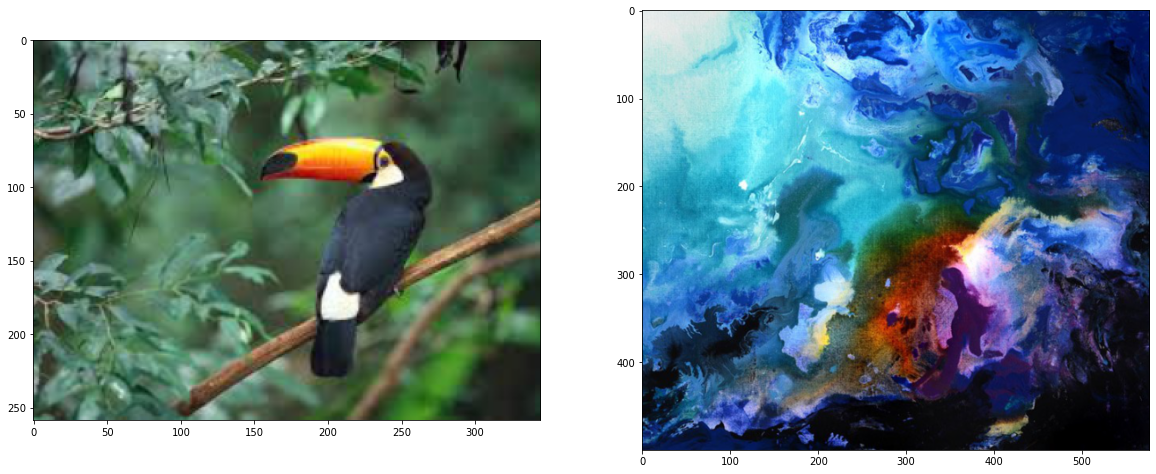

In [100]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 10))
ax1.imshow(dp_content)
ax2.imshow(dp_style)

In [101]:
def get_features(model, image):
  layers = {
      '0' : 'conv1_1',
      '5' : 'conv2_1',
      '10' : 'conv3_1',
      '19' : 'conv4_1',
      '21' : 'conv4_2',
      '28' : 'conv5_1'
  }

  x = image
  features = {}

  for name, layer in model._modules.items():
    x = layer(x)
    if name in layers:
      features[layers[name]] = x
  
  return features

In [102]:
content_feats = get_features(vgg19, content)
style_feats = get_features(vgg19, style)

In [103]:
def gram_mat(p_image):
  b,c,h,w = p_image.size()
  p_image = p_image.view(c, w*h)
  gram = torch.mm(p_image, p_image.t())
  return gram

In [104]:
style_gram = {layer : gram_mat(style_feats[layer]) for layer in style_feats}

In [105]:
def content_loss(content_conv4_2, gen_conv4_2):
  return torch.mean((gen_conv4_2 - content_conv4_2)**2)

In [106]:
style_weights = {
    'conv1_1' : 1.0,
    'conv2_1' : 0.75,
    'conv3_1' : 0.2,
    'conv4_1' : 0.2,
    'conv5_1' : 0.2
}

In [107]:
def style_loss(style_weights, gen_feats, style_gram):
  loss = 0.0

  for layer in style_weights:
    layer_gen_feat = gen_feats[layer]
    layer_gen_gram = gram_mat(layer_gen_feat)
    b,c,h,w = layer_gen_feat.shape
    layer_loss = style_weights[layer] * torch.mean((layer_gen_gram - style_gram[layer])**2)
    loss += layer_loss/(c*h*w)
  
  return loss

In [108]:
gen_img = content.clone().requires_grad_(True).to(DEVICE)
gen_feats = get_features(vgg19, gen_img)
content_loss(content_feats['conv4_2'], gen_feats['conv4_2']), style_loss(style_weights, gen_feats, style_gram)

(tensor(0., device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(2837.5439, device='cuda:0', grad_fn=<AddBackward0>))

In [109]:
from torch import optim

LR = 0.005

optimizer = optim.Adam([gen_img], lr=LR)

ALPHA = 1
BETA = 1e5
EPOCHS = 3000

In [110]:
def total_loss(c_loss, s_loss):
  return ALPHA*c_loss + BETA*s_loss

In [111]:
from tqdm import tqdm

results = []

for i in tqdm(range(EPOCHS)):
  gen_feats = get_features(vgg19, gen_img)
  c_loss = content_loss(content_feats['conv4_2'], gen_feats['conv4_2'])
  s_loss = style_loss(style_weights, gen_feats, style_gram)
  t_loss = total_loss(c_loss, s_loss)

  optimizer.zero_grad()
  t_loss.backward()
  optimizer.step()

  if i%500 == 0:
    print(f"Epoch: {i+1} Loss: {t_loss}")
    results.append(deprocess(gen_img.detach()))


  0%|          | 7/3000 [00:00<00:56, 53.15it/s]

Epoch: 1 Loss: 283754400.0


 17%|█▋        | 506/3000 [00:18<01:46, 23.37it/s]

Epoch: 501 Loss: 10683694.0


 34%|███▎      | 1009/3000 [00:37<01:05, 30.25it/s]

Epoch: 1001 Loss: 6865465.0


 50%|█████     | 1509/3000 [00:54<00:48, 31.01it/s]

Epoch: 1501 Loss: 5318446.5


 67%|██████▋   | 2009/3000 [01:11<00:32, 30.59it/s]

Epoch: 2001 Loss: 4467170.0


 84%|████████▎ | 2509/3000 [01:29<00:16, 30.10it/s]

Epoch: 2501 Loss: 3898605.25


100%|██████████| 3000/3000 [01:46<00:00, 28.08it/s]


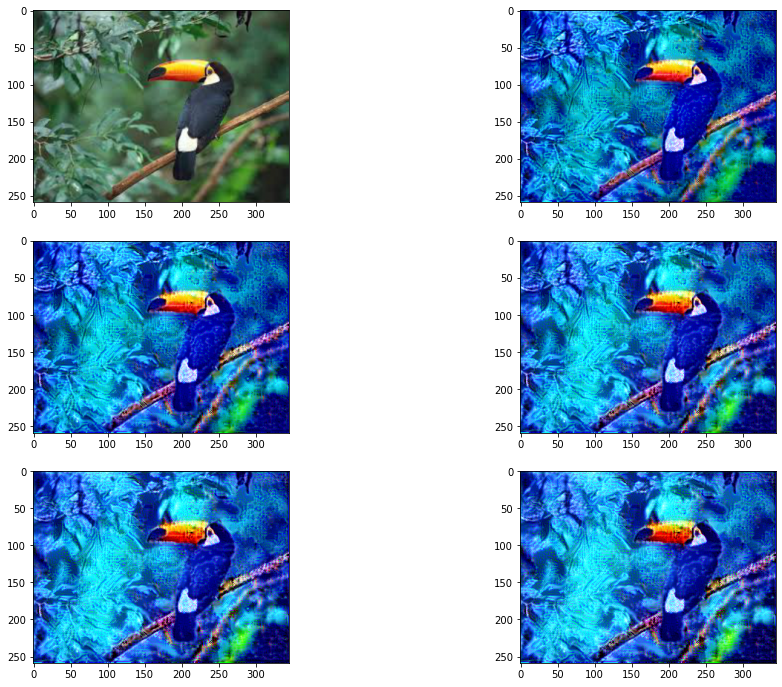

In [113]:
plt.figure(figsize=(16,12))
for i in range(len(results)):
  plt.subplot(3,2, i+1)
  plt.imshow(results[i])
plt.show()

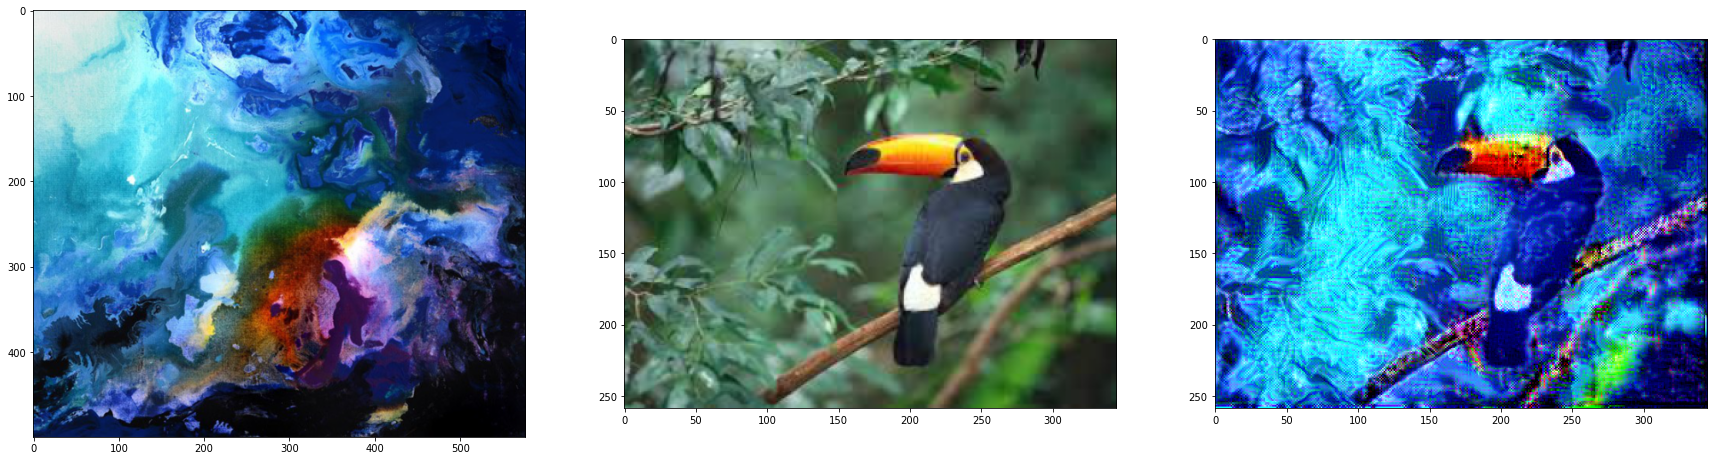

In [115]:
gen_copy = deprocess(gen_img.detach())
content_copy = deprocess(content)
style_copy = deprocess(style)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(30,24))
ax3.imshow(gen_copy)
ax2.imshow(content_copy)
ax1.imshow(style_copy)